# Using Machine Learning Tools: Workshop 2

**Chapter 1 – The Machine Learning landscape**

This workshop is a cut down version of the code accompanying Chapter 1 of
_Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow, 2e_ by Aurelien Geron. All code for the book is available at https://github.com/ageron/handson-ml2

**Opening notebooks and plotting**

First, check they have the required Python libraries.

Although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead.

In [1]:
# Python ≥3.5 is required
!python --version

Python 3.12.2


If the Python version looks correct, try and run the below code and check if you can plot the figures.

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
sklearn.__version__

'1.4.1.post1'

In [3]:
# To plot pretty figures directly within Jupyter
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
# Code example
import numpy as np
import pandas as pd
import sklearn.linear_model

In [5]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

# Load the data
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

In [6]:
# Load the data using a pandas function
country_stats = pd.read_csv("lifesat.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'lifesat.csv'

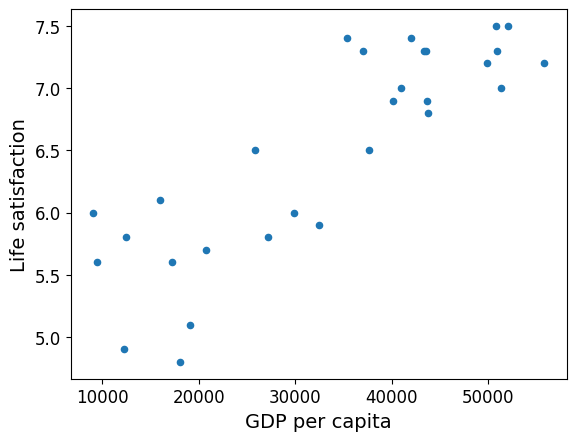

In [7]:
# Plot the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

If the above runs and you can successfully generate the plot, try asking ChatGPT to write code for reading in the data, displaying a scatterplot, and two other types of visualisation of the data. What has it suggested? How is this different?

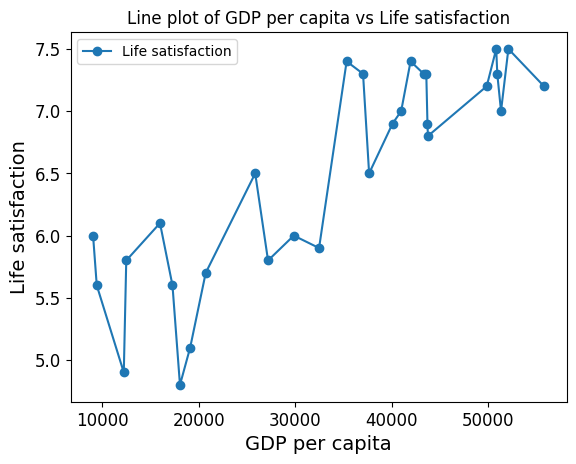

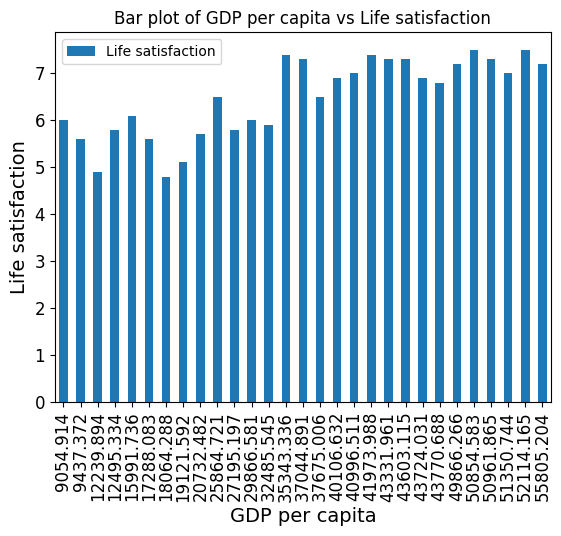

In [8]:
# Line plot
country_stats.sort_values(by="GDP per capita", inplace=True)
country_stats.plot(kind='line', x="GDP per capita", y='Life satisfaction', marker='o')
plt.title('Line plot of GDP per capita vs Life satisfaction')
plt.xlabel('GDP per capita')
plt.ylabel('Life satisfaction')
plt.show()

# Bar plot
country_stats.plot(kind='bar', x="GDP per capita", y='Life satisfaction')
plt.title('Bar plot of GDP per capita vs Life satisfaction')
plt.xlabel('GDP per capita')
plt.ylabel('Life satisfaction')
plt.show()

Bar Plot: This visualization provides a clear comparison of GDP per capita across different countries, making it easy to see which countries have higher or lower GDP.

Line Plot: This plot shows the trend of life satisfaction across countries when sorted by GDP per capita, helping to identify any patterns or trends in how life satisfaction changes with GDP.

**Run code to perform linear regression.**

 Run the below code and ask ChatGPT to create code to do the same thing. Create code based on last cell (model.predict) to plot the model output at a series of regularly spaced points, and check that you land on the red line from the previous cell.

 Then, retrain on a randomly chosen subset of the data (50% of it, but not just the first half - random selection) and show the results of the model fit on the full data and the model fit on the random subset on the same plot.

In [9]:
# We should assign each feature to one variable
X = country_stats["GDP per capita"]
X.shape # This is one dimmension array

# However scikit-learn library expects the input data to be in a two-dimensional array format.
# In this way: (n_samples, n_features)

(29,)

In [10]:
# We can use different tricks to reshape the dimmension of our data (np.c_ or reshape)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]
print(X.shape)
print(y.shape)

(29, 1)
(29, 1)


In [11]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

In [12]:
# Train the model
model.fit(X, y)

LinearRegression()

In [13]:
# Do you remember what is the equation for a linear regression?

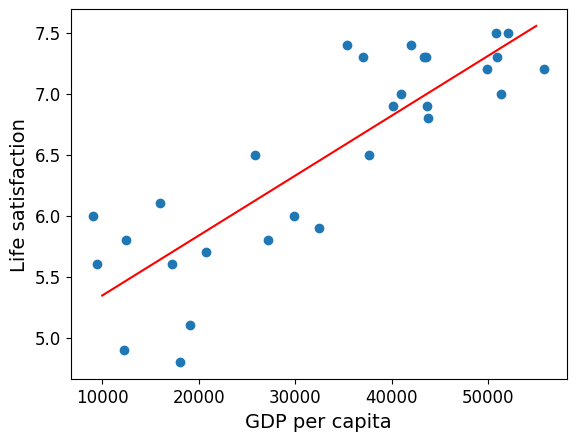

In [14]:
# Visualise the model as a red line
b0, b1 = model.intercept_[0], model.coef_[0][0]
modelX = np.linspace(10000, 55000, 1000)
plt.scatter(X, y)
plt.xlabel('GDP per capita')
plt.ylabel('Life satisfaction')
plt.plot(modelX, b0 + b1*modelX, "r")
plt.show()

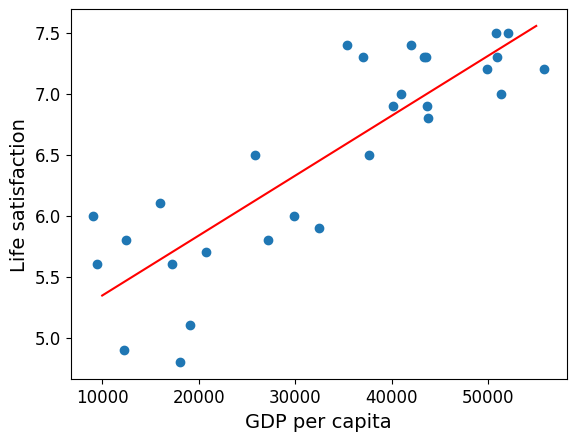

In [17]:
# Also, we can use predict to generate our model
modelX = np.linspace(10000, 55000, 1000)
plt.scatter(X, y)
plt.xlabel('GDP per capita')
plt.ylabel('Life satisfaction')
plt.plot(modelX, model.predict(modelX.reshape(-1,1)), "r")
plt.show()

In [ ]:
# Make a prediction for Cyprus
X_new = 22587  # Cyprus' GDP per capita

# We can predict using the given equation
b0 + b1*X_new

5.962423376619663

In [23]:
# Also you can use the function predict
print(model.predict([[X_new]])) # outputs [[ 5.96242338]]

[[5.96242338]]


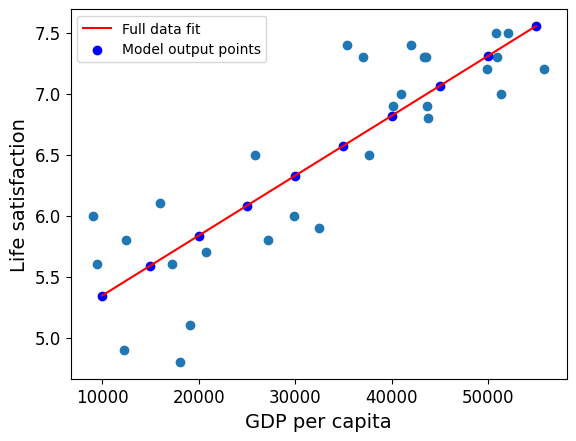

In [19]:
# Create a series of regularly spaced points for plotting model output
regularly_spaced_points = np.linspace(10000, 55000, 10)

# Plot the regularly spaced points to check they land on the red line
plt.scatter(X, y)
plt.xlabel('GDP per capita')
plt.ylabel('Life satisfaction')
plt.plot(modelX, model.predict(modelX.reshape(-1, 1)), "r", label="Full data fit")
plt.scatter(regularly_spaced_points, model.predict(regularly_spaced_points.reshape(-1, 1)), color='blue', marker='o', label='Model output points')
plt.legend()
plt.show()


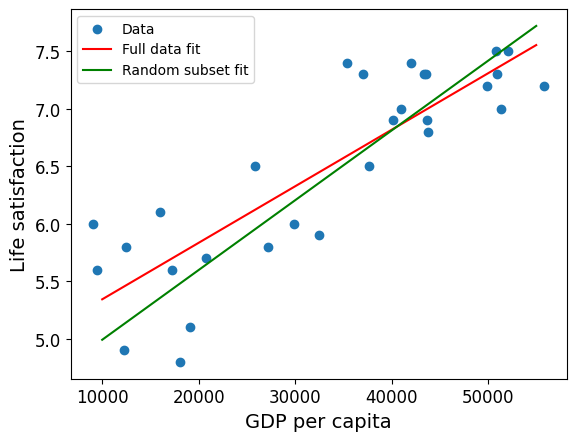

In [35]:
from sklearn.model_selection import train_test_split

# Split the data into a random subset (50% of the data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Train the model on the random subset
subset_model = sklearn.linear_model.LinearRegression()
subset_model.fit(X_train, y_train)

# Plot the model predictions on the full dataset and the random subset
plt.scatter(X, y, label="Data")
plt.xlabel('GDP per capita')
plt.ylabel('Life satisfaction')
plt.plot(modelX, model.predict(modelX.reshape(-1, 1)), "r", label="Full data fit")
plt.plot(modelX, subset_model.predict(modelX.reshape(-1, 1)), "g", label="Random subset fit")
plt.legend()
plt.show()

**Exploring with different data**

Spend this time running more versions with different data: different randomly selected percentages and/or adding an individual extra point that does not lie on the regression line (and controlling how far from the line it is). Repeat this many times with different random samples and/or added points (with different distance from the line).


## Extension: How you can check the error of a model?

In a first gaze, we can check the error of a model visually, however we can use different `metrics` in order to check properly the performance of a model. For instance, we can use the the **Mean Square Error** for a regression problem. We will see more `metrics` in future workshops.

$$MSE(y,\hat{y}) = \frac{1}{n_{samples}}\sum_{i=0}^{n_{samples}-1} (y_i-\hat{y}_i)^{2}$$


In [37]:
# Load mse function
from sklearn.metrics import mean_squared_error
# Check the performance
mean_squared_error(y, model.predict(X))

0.18075033705835136

## What now?

* Try to do the **Activity 5: Extended dataset** available in MyUni.
* Looking for something more challenging, try to perform the **Activity 6: Extension** available in MyUni.

## Optional

You can explore a much long version of this code in the next Jupyter Notebook available in Google Colab.

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/01_the_machine_learning_landscape.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>